In [60]:
import numpy as np
from datascience import *
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)
warnings.simplefilter('ignore', UserWarning)

def standard_units(x):
        return(x - np.average(x))/np.std(x)

def correlation(table, x=0, y=1):
        x_su = standard_units(table.column(x))
        y_su = standard_units(table.column(y))
        return np.average(x_su * y_su)

def slope(table, x=0, y=1):
        r = correlation(table, x, y)
        return r * np.std(table.column(y))/np.std(table.column(x))

def intercept(table, x=0, y=1):
        s = slope(table, x, y)
        return np.average(table.column(y)) - s * np.average(table.column(x))

def regression_predict_point(table, x, y, given_x):
    return slope(table, x, y) * given_x + intercept(table, x, y)
    
def fitted_values(table, x=0, y=1):
    s = slope(table, x, y)
    i = intercept(table, x, y)
    return s * table.column(x) + i

def residuals(table, x=0, y=1):
    return table.column(y) - fitted_values(table, x, y)

def plot_line(x1, y1, x2, y2, title='Regression'):
    xs, ys = zip([x1, y1], [x2, y2])
    plots.plot(xs, ys, label=title)

def plot_data(table, x=0):
    table.scatter(x, label='Data')

def plot_regression(table, x=0, y=1):
    f = fitted_values(table)
    t = table.with_column('Regression', f)
    plot_data(t, x)
    plot_line(table.column(x)[0], f[0], table.column(x)[-1], f[-1])

def plot_residuals(table, x=0, y=1):
    t = table.with_column('Residual', residuals(table, x, y)).select(x, 'Residual')
    plot_data(t, x)  
    
def bootstrap_prediction(table, new_x, x=0, y=1, repetitions=5000):
    predictions = []
    for i in np.arange(repetitions):
        resample = table.sample()
        s = slope(resample, x, y)
        i = intercept(resample, x, y)
        predicted_y = s * new_x + i
        predictions.append(predicted_y)
    left = percentile(2.5, predictions)
    right = percentile(97.5, predictions)
    Table().with_column('Prediction', predictions).hist(bins=20)
    plots.xlabel('predictions at x='+str(new_x))
    plots.plot([left, right], [0, 0], color='yellow', lw=8);
    print('Approximate 95%-confidence interval for height of true line:')
    print(left, right, '(width =', right - left, ')')    
    
def run_tests():
        test_x = [2, 4, 5, 6, 8, 10, 11, 12, 14, 16, 17 ]
        test_y = [1, 2, 3, 4, 5, 6, 9, 11, 13, 16, 17 ]
        test_table = Table().with_columns('X', test_x, 'Y', test_y)
        print("SU_X: ", standard_units(test_x))
        print("SU_Y: ", standard_units(test_y))
        print("Slope:", slope(test_table))
        print("Intercept: ", intercept(test_table))
        print("Fitted Values", fitted_values(test_table))
        print("Residuals:", residuals(test_table))
        plot_regression(test_table)
        plot_residuals(test_table)
        bootstrap_prediction(test_table, 5)
                

SU_X:  [-1.58679216 -1.16619665 -0.95589889 -0.74560114 -0.32500562  0.09558989
  0.30588765  0.5161854   0.93678091  1.35737643  1.56767418]
SU_Y:  [-1.28316883 -1.09744702 -0.91172522 -0.72600341 -0.54028161 -0.35455981
  0.2026056   0.57404921  0.94549282  1.50265823  1.68838003]
Slope: 1.11184210526
Intercept:  -2.70394736842
Fitted Values [ -0.48026316   1.74342105   2.85526316   3.96710526   6.19078947
   8.41447368   9.52631579  10.63815789  12.86184211  15.08552632
  16.19736842]
Residuals: [ 1.48026316  0.25657895  0.14473684  0.03289474 -1.19078947 -2.41447368
 -0.52631579  0.36184211  0.13815789  0.91447368  0.80263158]
Approximate 95%-confidence interval for height of true line:
1.44307270233 3.52890528905 (width = 2.08583258672 )


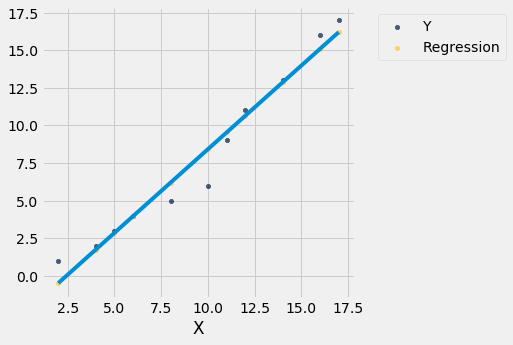

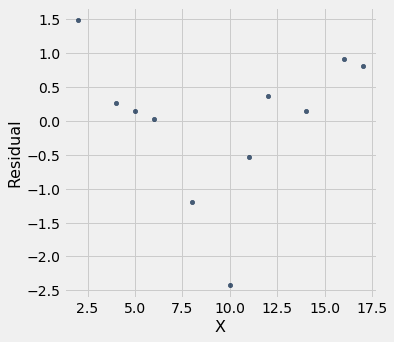

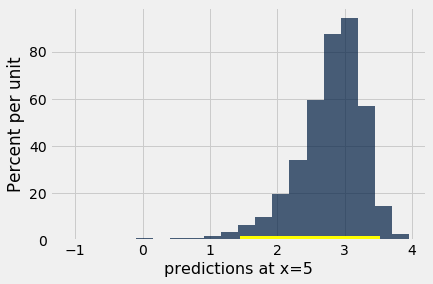

In [61]:
run_tests()